# Analysis of Nobel Prize Laureates (1901-2023)

## Introduction

The Nobel Prize, awarded since 1901, is one of the most prestigious international accolades. Each year, prizes are bestowed in six categories: Chemistry, Literature, Physics, Physiology or Medicine, Economics, and Peace.

In this project, we will explore and analyze data on Nobel Prize laureates from 1901 to 2023, provided by the Nobel Foundation through their API.

Our analysis aims to answer several key questions, including:

1. What is the most commonly awarded gender and birth country among laureates?
2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners across all categories?
3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?
4. Who was the first woman to receive a Nobel Prize, and in what category?
5. Which individuals or organizations have won more than one Nobel Prize throughout the years?

Through this analysis, we will uncover fascinating trends and valuable insights into the history of Nobel Prizes.

Let's begin our exploration!

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
df = pd.read_csv("Dataset/nobel.csv")

In [46]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [47]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [48]:
df.shape

(1000, 18)

### 1. What is the most commonly awarded gender and birth country among laureates?

In [49]:
top_nobel_coutry_sum = df["birth_country"].groupby(df['prize']).agg('sum').value_counts()

In [50]:
top_nobel_coutry_sum

birth_country
United States of America                            64
United Kingdom                                      27
France                                              27
United States of AmericaUnited States of America    26
0                                                   21
                                                    ..
Guadeloupe Island                                    1
Bosnia (Bosnia and Herzegovina)                      1
Ottoman Empire (Turkey)                              1
Austria-Hungary (Ukraine)Germany                     1
CanadaUnited States of AmericaNetherlands            1
Name: count, Length: 281, dtype: int64

In [51]:
top_nobel_gender = df["sex"].groupby(df['prize']).agg('sum').value_counts()

In [52]:
top_nobel_gender

sex
Male                  319
MaleMale              125
MaleMaleMale           97
Female                 28
0                      20
MaleFemaleMale          8
MaleMaleFemale          7
FemaleMale              6
MaleFemale              6
FemaleFemale            2
FemaleFemaleFemale      1
FemaleMaleMale          1
FemaleFemaleMale        1
Name: count, dtype: int64

So we can see that the top 3 countries are the USA, United Kingdom, and Germany. As for gender, men have received the most Nobel Prizes.

### 2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners across all categories?

In [54]:
birth_nobel_prize 

array(['Netherlands', 'France', 'Prussia (Poland)', 'Switzerland',
       'Prussia (Germany)', 'Schleswig (Germany)', 'India', 'Sweden',
       'Norway', 'Faroe Islands (Denmark)', 'United Kingdom',
       'Russian Empire (Poland)', 'Scotland', 'Spain', 'Russia', nan,
       'Poland', 'Germany', 'Austrian Empire (Czech Republic)',
       'Hungary (Slovakia)', 'Tuscany (Italy)', 'Italy',
       'United States of America', 'Bavaria (Germany)',
       'British India (India)', 'Austrian Empire (Italy)', 'New Zealand',
       'East Friesland (Germany)', 'Russian Empire (Ukraine)', 'Denmark',
       'Luxembourg', 'Russian Empire (Latvia)', 'Belgium',
       'Hesse-Kassel (Germany)', 'Germany (Russia)',
       'Mecklenburg (Germany)', 'Austria', 'Prussia (Russia)',
       'Australia', 'Austria-Hungary (Slovenia)', 'Ireland', 'Canada',
       'Java, Dutch East Indies (Indonesia)', 'Austrian Empire (Austria)',
       'Germany (Poland)', 'W&uuml;rttemberg (Germany)', 'Argentina',
       'Austria

In [55]:
us_birth_nobel = df[df["birth_country"] == "United States of America"]


In [56]:
us_birth_nobel.shape

(291, 18)

In [57]:
us_birth_nobel["birth_date"].dtype

dtype('O')

In [58]:
def corriger_date(valeur):
    if pd.isna(valeur):
        return pd.NaT
    if isinstance(valeur, (int, float)):
        return pd.to_datetime(str(int(valeur)), format='%Y')
    if isinstance(valeur, str):
        if '-00-00' in valeur:
            return pd.to_datetime(valeur[:4], format='%Y')
        else:
            return pd.to_datetime(valeur, errors='coerce')
    return pd.NaT

In [59]:
us_birth_nobel['birth_date'] = us_birth_nobel['birth_date'].apply(corriger_date)

/var/folders/lz/zsz00k2n3pbflxxlfqttyt500000gn/T/ipykernel_3285/4125265217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_birth_nobel['birth_date'] = us_birth_nobel['birth_date'].apply(corriger_date)


In [60]:
us_birth_nobel['birth_date'] = pd.to_datetime(us_birth_nobel['birth_date'])

/var/folders/lz/zsz00k2n3pbflxxlfqttyt500000gn/T/ipykernel_3285/2201537361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_birth_nobel['birth_date'] = pd.to_datetime(us_birth_nobel['birth_date'])


In [61]:
us_birth_nobel['birth_year'] = us_birth_nobel['birth_date'].dt.year

/var/folders/lz/zsz00k2n3pbflxxlfqttyt500000gn/T/ipykernel_3285/3822406381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_birth_nobel['birth_year'] = us_birth_nobel['birth_date'].dt.year


In [62]:
us_birth_nobel[us_birth_nobel["birth_year"].isna()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,birth_year
850,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,NaT,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America,NaN,NaN,NaN,NaN


In [63]:
us_birth_nobel['birth_year'].min()

1845.0

In [64]:
us_birth_nobel['birth_year'].max()

1969.0

In [65]:
us_birth_nobel["birth_year"].value_counts().sum

<bound method Series.sum of birth_year
1918.0    10
1941.0    10
1915.0     7
1943.0     7
1931.0     7
          ..
1909.0     1
1845.0     1
1879.0     1
1906.0     1
1966.0     1
Name: count, Length: 92, dtype: int64>

Now we index value by decade to analyse the result

In [66]:
bins = [1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970]
labels = ['1840-1850','1850-1860', '1860-1870', '1870-1880', '1880-1890', '1890-1900',
          '1900-1910', '1910-1920', '1920-1930', '1930-1940', '1940-1950', '1950-1960', '1960-1970']

In [67]:
us_birth_nobel["decade"] = pd.cut(us_birth_nobel["birth_year"], bins=bins, labels=labels, right=False)

/var/folders/lz/zsz00k2n3pbflxxlfqttyt500000gn/T/ipykernel_3285/4199984728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_birth_nobel["decade"] = pd.cut(us_birth_nobel["birth_year"], bins=bins, labels=labels, right=False)


In [72]:
us_birth_nobel["decade"]

35     1850-1860
72     1840-1850
79     1860-1870
95     1850-1860
117    1860-1870
         ...    
987    1950-1960
988    1950-1960
990    1950-1960
995    1940-1950
999    1940-1950
Name: decade, Length: 291, dtype: category
Categories (13, object): ['1840-1850' < '1850-1860' < '1860-1870' < '1870-1880' ... '1930-1940' < '1940-1950' < '1950-1960' < '1960-1970']

In [73]:
seeNan_value = us_birth_nobel[us_birth_nobel["decade"].isna()]

In [74]:
seeNan_value.shape

(1, 20)

In [71]:
seeNan_value

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,birth_year,decade
850,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,NaT,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America,NaN,NaN,NaN,NaN,NaN


We can find is birth date to update the dataset so it was born on 22/09/1959 so we add that on the dataset 

In [77]:
us_birth_nobel.loc[850, 'decade'] = '1950-1960'

In [78]:
seeNan_value

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,birth_year,decade
850,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,NaT,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America,NaN,NaN,NaN,NaN,NaN


In [79]:
seeNan_value = us_birth_nobel[us_birth_nobel["decade"].isna()]

In [80]:
seeNan_value

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,birth_year,decade


In [83]:
top_decade = us_birth_nobel['decade'].value_counts()

In [84]:
top_decade

decade
1940-1950    59
1910-1920    45
1920-1930    44
1930-1940    41
1950-1960    28
1900-1910    21
1890-1900    14
1960-1970    12
1880-1890    11
1860-1870     8
1870-1880     4
1850-1860     3
1840-1850     1
Name: count, dtype: int64

In [88]:
df = top_decade.reset_index()
df.columns = ['decade', 'counts']  

In [89]:
df

,decade,counts
0,1940-1950,59
1,1910-1920,45
2,1920-1930,44
3,1930-1940,41
4,1950-1960,28
5,1900-1910,21
6,1890-1900,14
7,1960-1970,12
8,1880-1890,11
9,1860-1870,8


Text(0.5, 1.0, 'Decadal Comparison of US-Born Nobel Prize Winners')

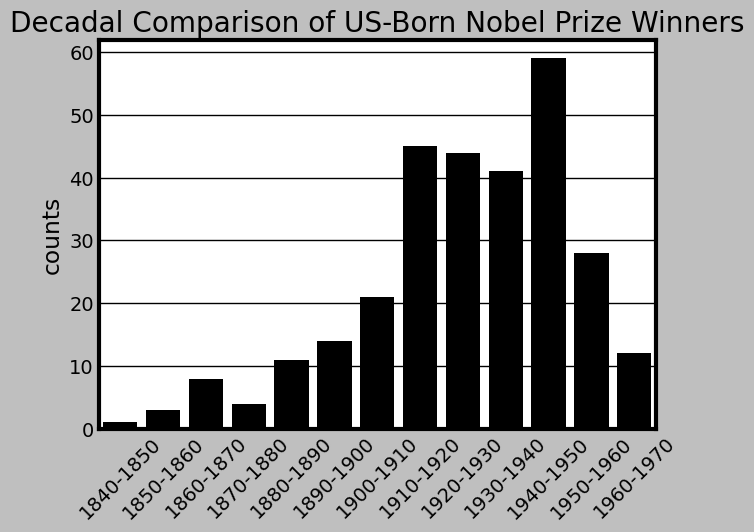

In [105]:
plt.style.use('grayscale')
sns.barplot(data=df, x="decade", y="counts")
plt.xticks(rotation = 45)
plt.xlabel("")
plt.title('Decadal Comparison of US-Born Nobel Prize Winners')



We can see that the 1940-1950 decade had the highest number of US-born Nobel Prize winners, with a total of 60 laureates.

### 3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?